In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import json

In [6]:
df = pd.read_csv("./evaluations/finetuning_intelli_light_prcol_reward.csv")

In [7]:
hd_columns = [column for column in df.columns if column.startswith("avg_hd")]
reward_columns = [column for column in df.columns if column.startswith("avg_reward")]
config_keys = list( json.loads(df.config.to_list()[0]).keys())

df["total_avg_reward"] = df[reward_columns].mean(axis=1)
df["total_avg_hd_distance"] = df[hd_columns].mean(axis=1)

for key in config_keys:
    df[key] = df["config"].apply(lambda x: json.loads(x)[key])

In [9]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_hd_distance", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
0,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4239.805189,0.289919
1,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-3885.523827,0.262575
3,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4084.860849,0.249183
2,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4000.989591,0.233199
4,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4194.675988,0.228978


In [10]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).head(20)

,config,total_avg_reward,total_avg_hd_distance
1,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-3885.523827,0.262575
2,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4000.989591,0.233199
3,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4084.860849,0.249183
4,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4194.675988,0.228978
0,"{""delay"": 3, ""waiting_time"": 3, ""light_switche...",-4239.805189,0.289919


In [11]:
df[["config", "total_avg_reward", "total_avg_hd_distance"]].sort_values("total_avg_reward", ascending=False).config.to_list()[:20]

['{"delay": 3, "waiting_time": 3, "light_switches": 2, "out_lanes_availability": 1}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 2, "out_lanes_availability": 2}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 2, "out_lanes_availability": 5}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 2, "out_lanes_availability": 10}',
 '{"delay": 3, "waiting_time": 3, "light_switches": 2, "out_lanes_availability": 0}']

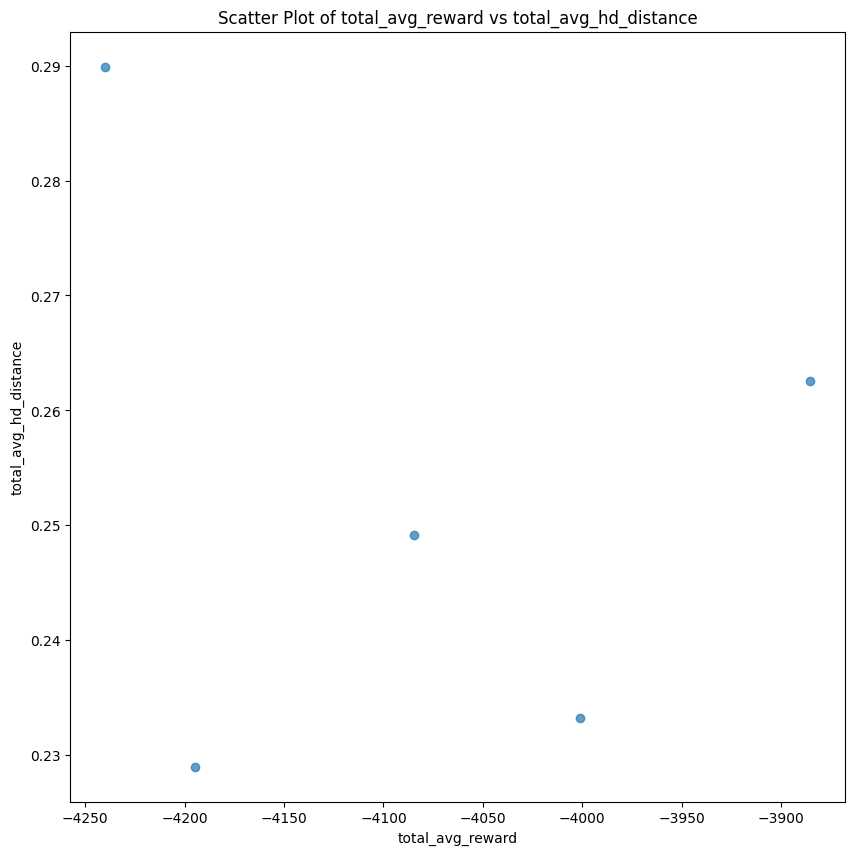

In [12]:
col1 = "total_avg_reward"
col2 = "total_avg_hd_distance"
plt.figure(figsize=(10, 10))
plt.scatter(df[col1], df[col2], alpha=0.7)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.show()

In [4]:
print(f"Correlation total_avg_hd_distance and total_avg_reward", df["total_avg_hd_distance"].corr(df['total_avg_reward']))

Correlation total_avg_hd_distance and total_avg_reward -0.4717016193757511


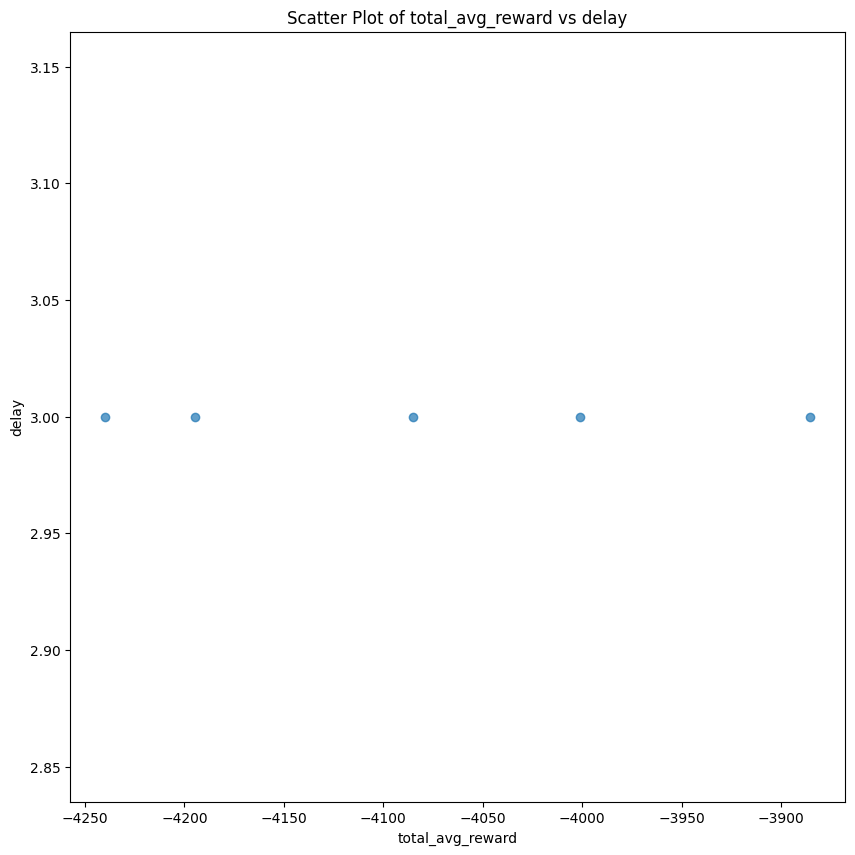

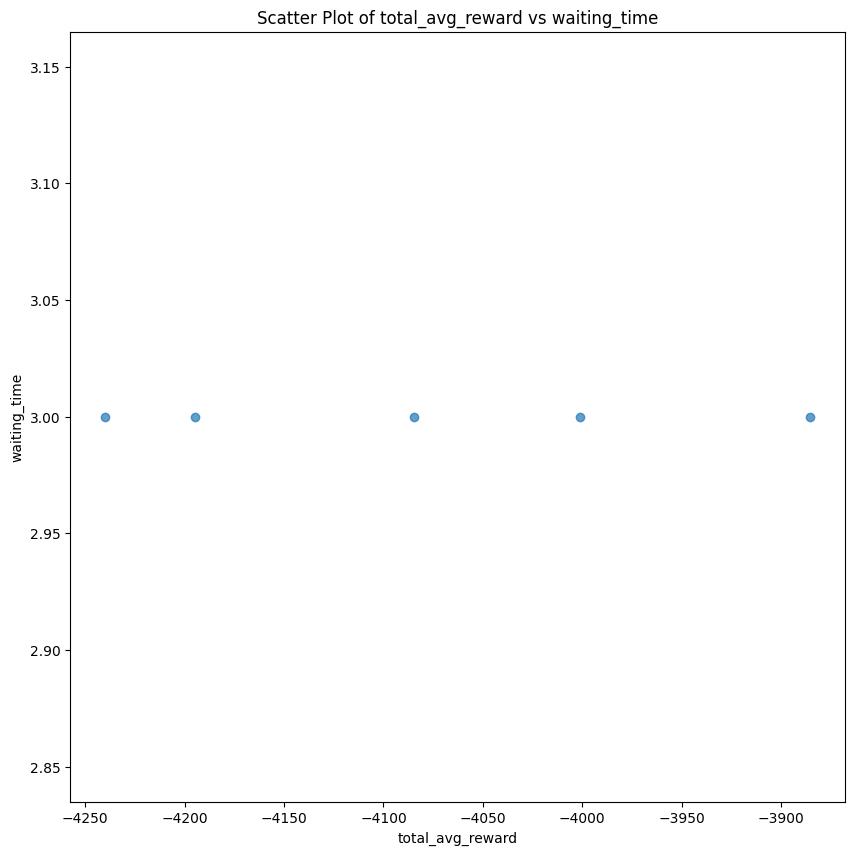

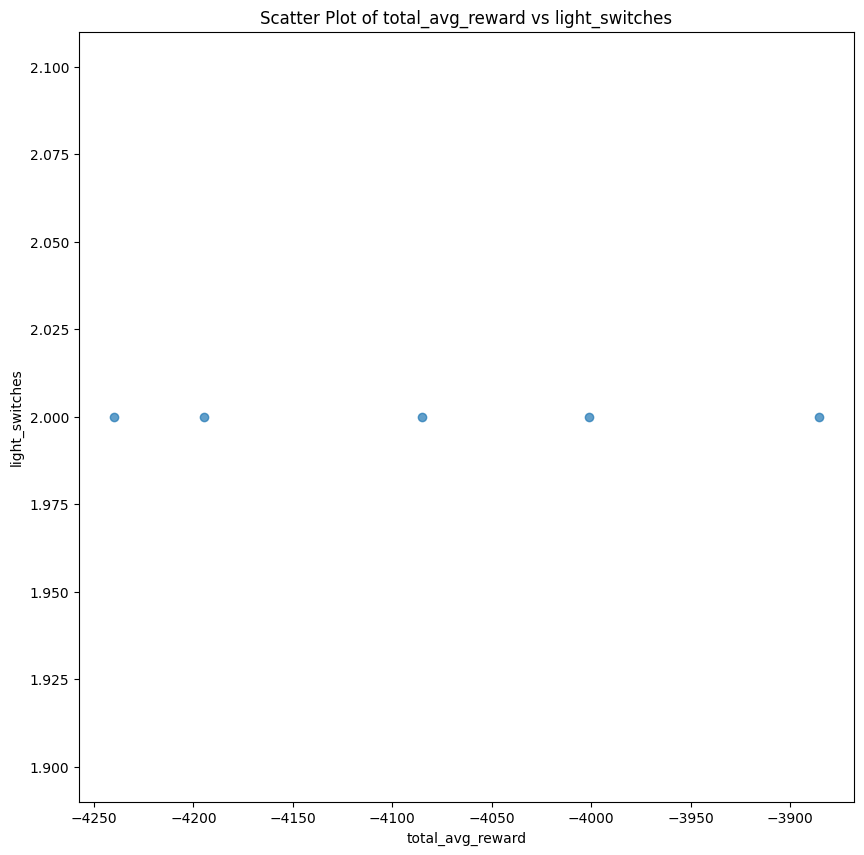

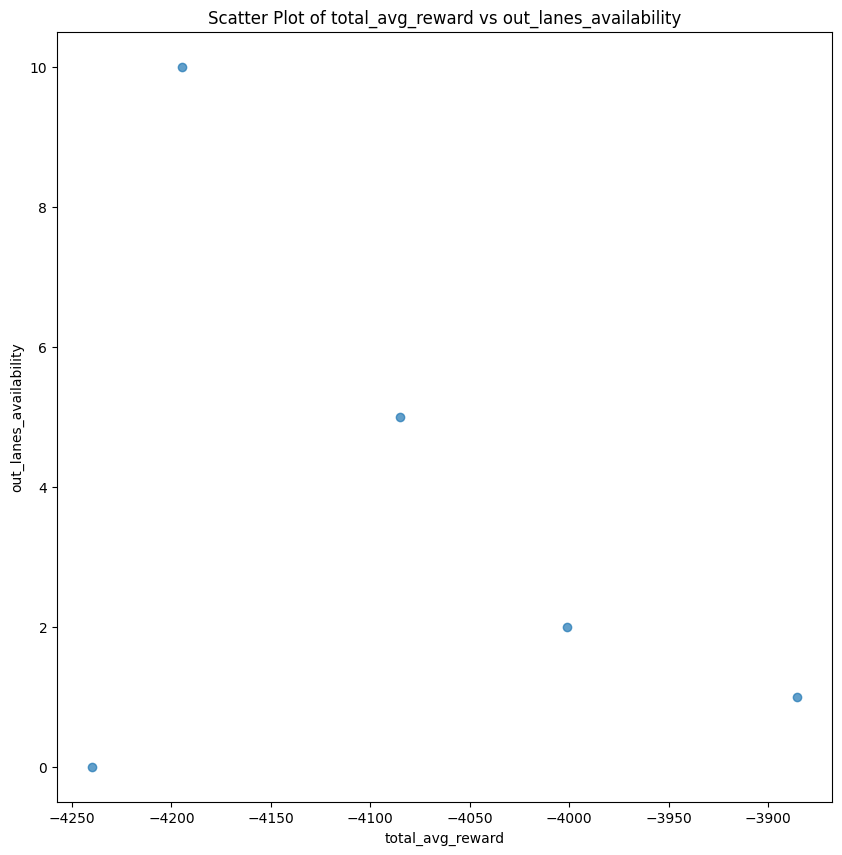

In [13]:
for col in config_keys:
    col1 = "total_avg_reward"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [14]:
for key in config_keys:
    print(df.groupby(key)['total_avg_reward'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and total_avg_reward", df[key].corr(df['total_avg_reward']))

   delay         mean        std
0      3 -4081.171089  143.84773
Correlation delay and total_avg_reward nan
   waiting_time         mean        std
0             3 -4081.171089  143.84773
Correlation waiting_time and total_avg_reward nan
   light_switches         mean        std
0               2 -4081.171089  143.84773
Correlation light_switches and total_avg_reward nan
   out_lanes_availability         mean  std
0                       0 -4239.805189  NaN
1                       1 -3885.523827  NaN
2                       2 -4000.989591  NaN
3                       5 -4084.860849  NaN
4                      10 -4194.675988  NaN
Correlation out_lanes_availability and total_avg_reward -0.3432946977856037


/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divi

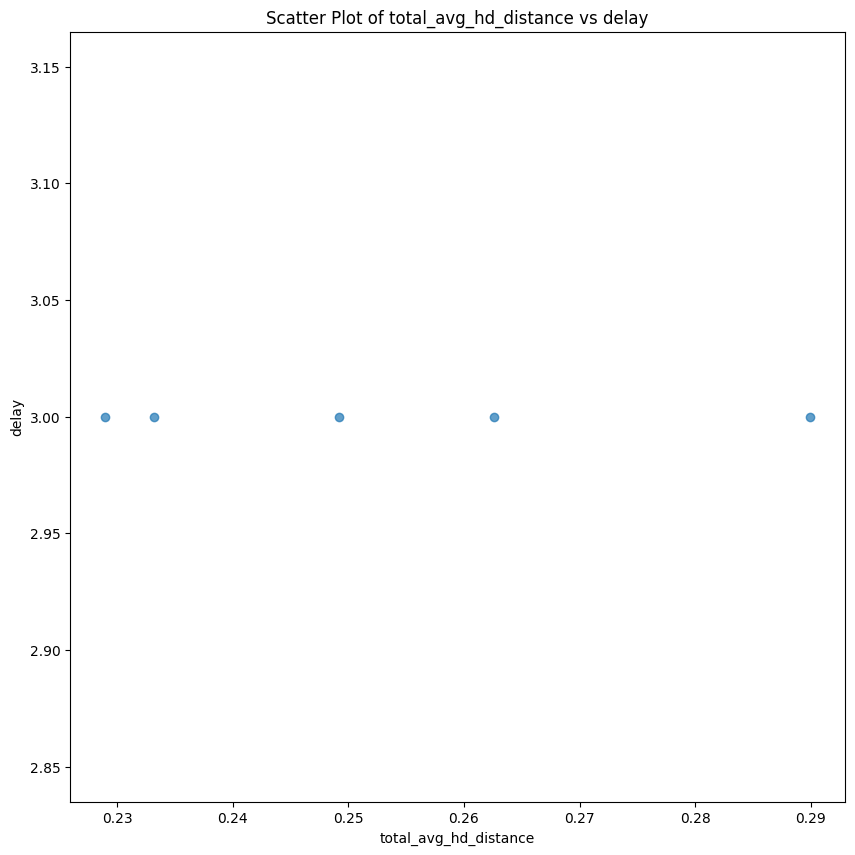

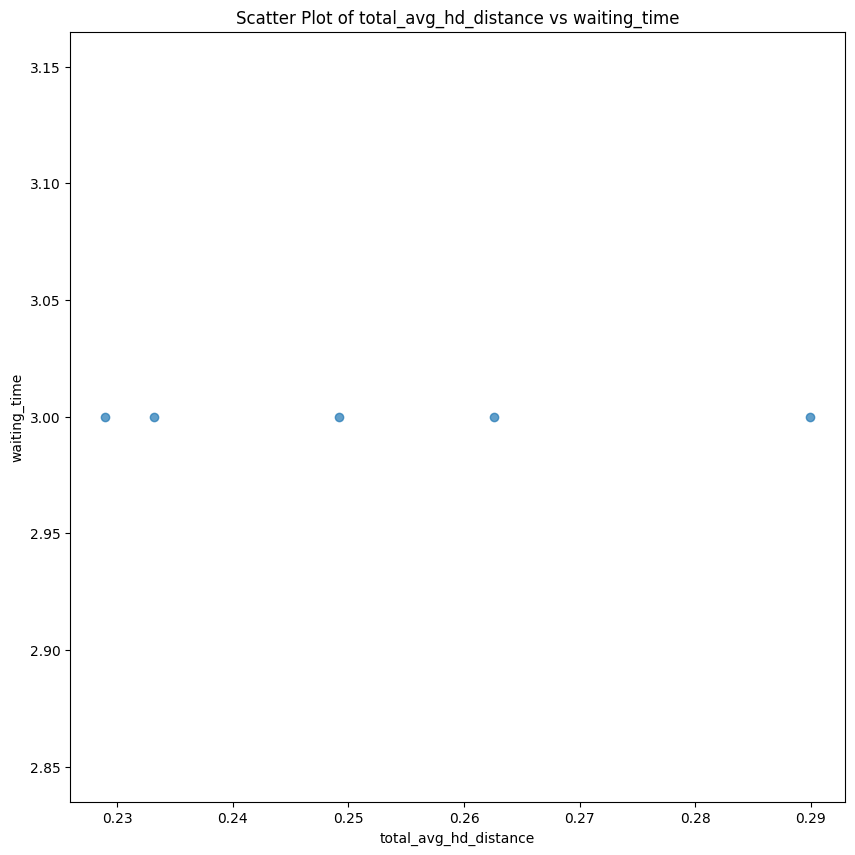

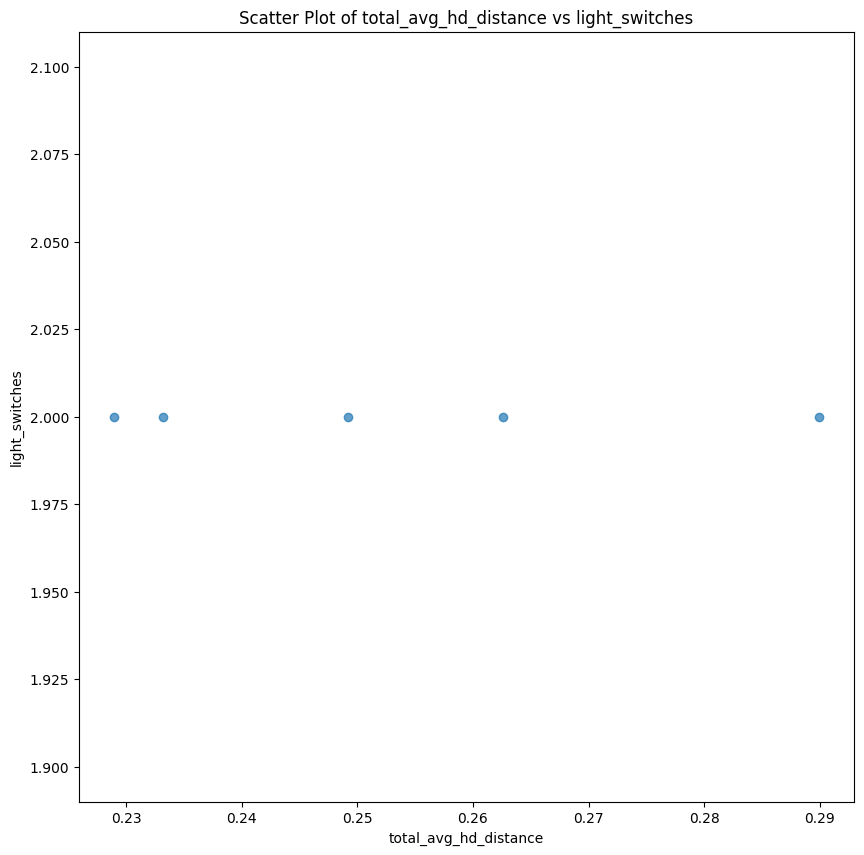

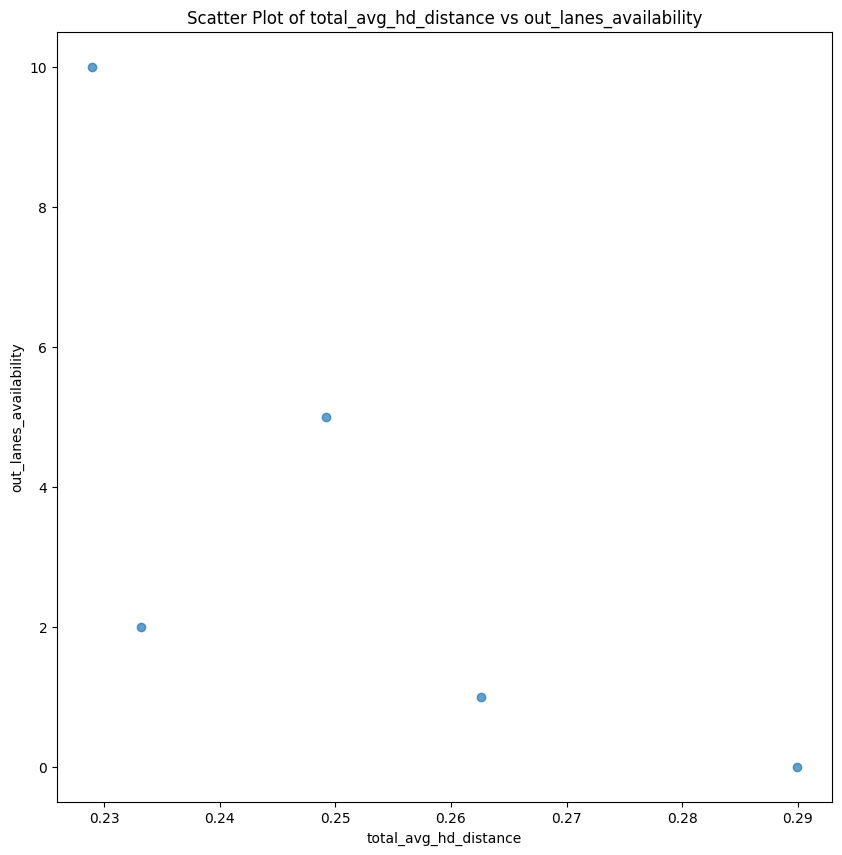

In [15]:
for col in config_keys:
    col1 = "total_avg_hd_distance"
    col2 = col
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

In [17]:
for key in config_keys:
    print(df.groupby(key)['total_avg_hd_distance'].agg(['mean', 'std']).reset_index())
    print(f"Correlation {key} and hd_distance", df[key].corr(df['total_avg_hd_distance']))

   delay      mean       std
0      3  0.252771  0.024689
Correlation delay and hd_distance nan
   waiting_time      mean       std
0             3  0.252771  0.024689
Correlation waiting_time and hd_distance nan
   light_switches      mean       std
0               2  0.252771  0.024689
Correlation light_switches and hd_distance nan
   out_lanes_availability      mean  std
0                       0  0.289919  NaN
1                       1  0.262575  NaN
2                       2  0.233199  NaN
3                       5  0.249183  NaN
4                      10  0.228978  NaN
Correlation out_lanes_availability and hd_distance -0.7153319442894434


/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ruben/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divi

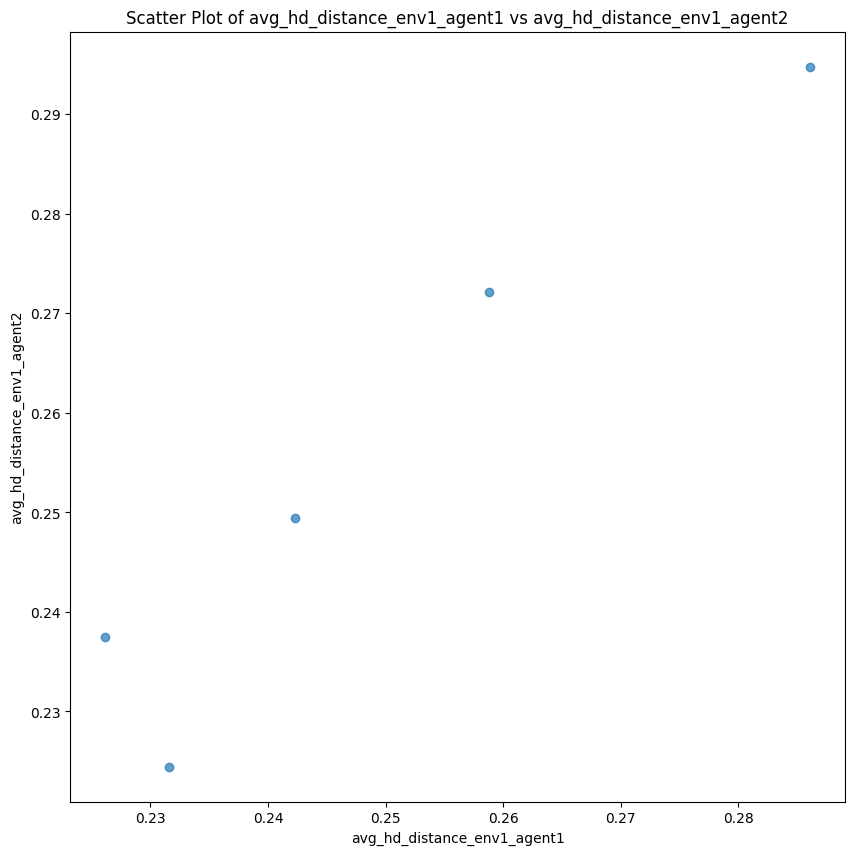

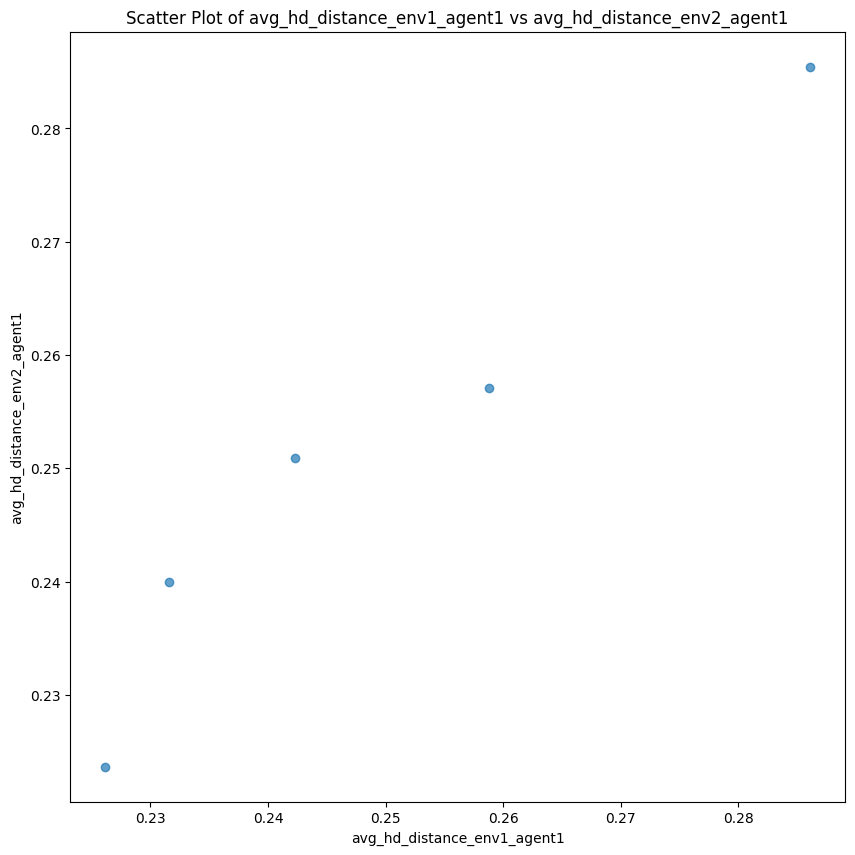

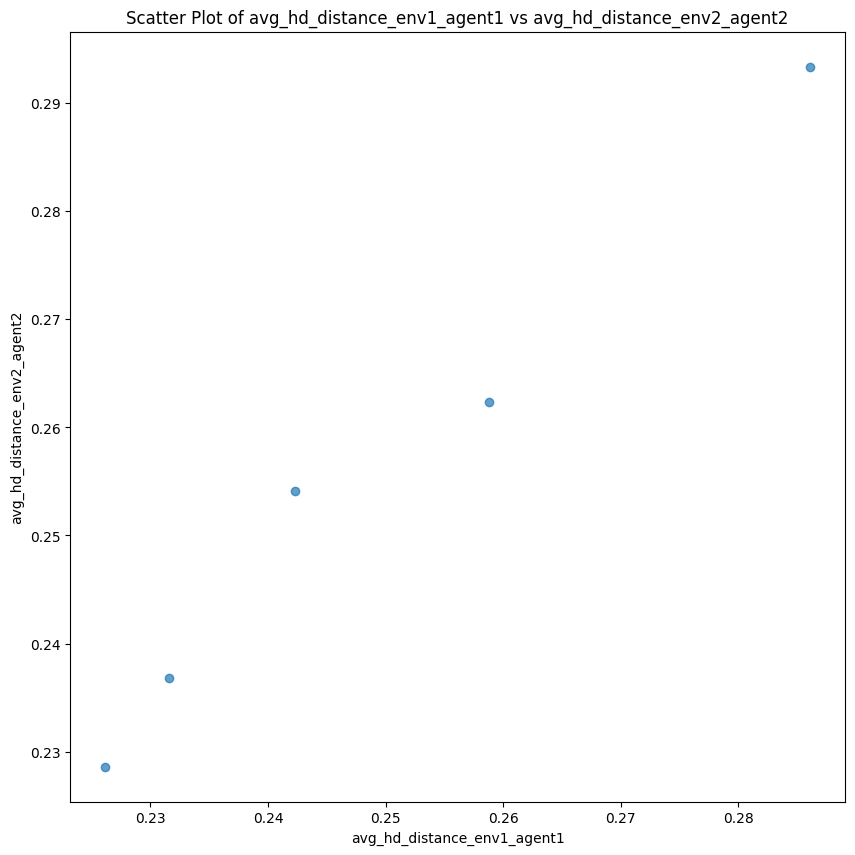

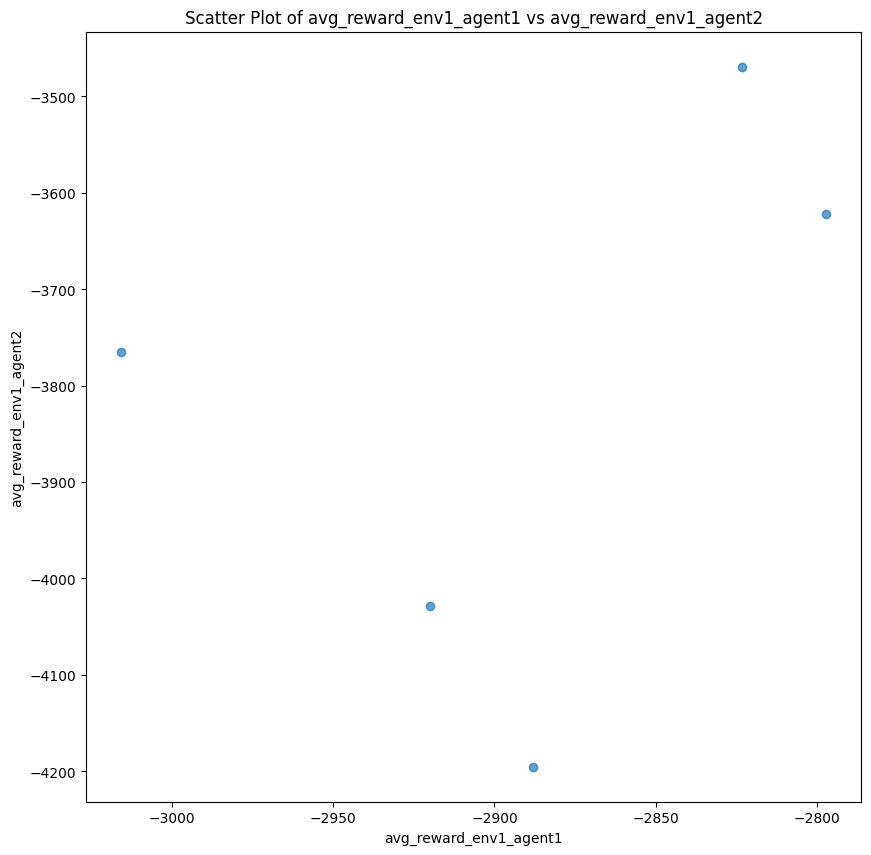

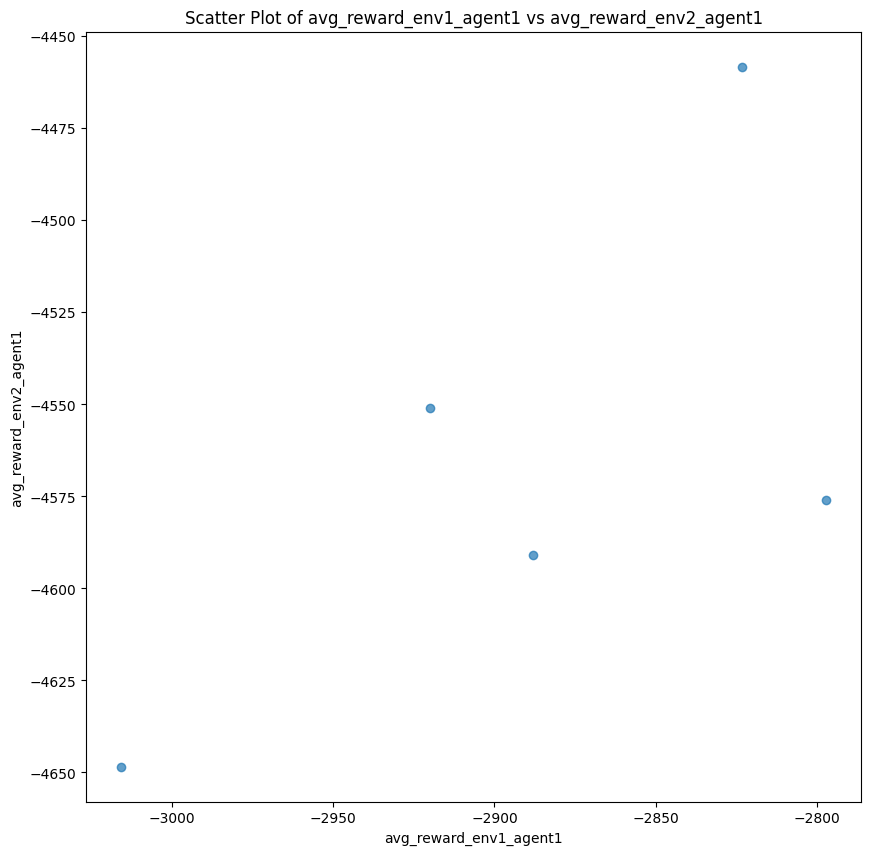

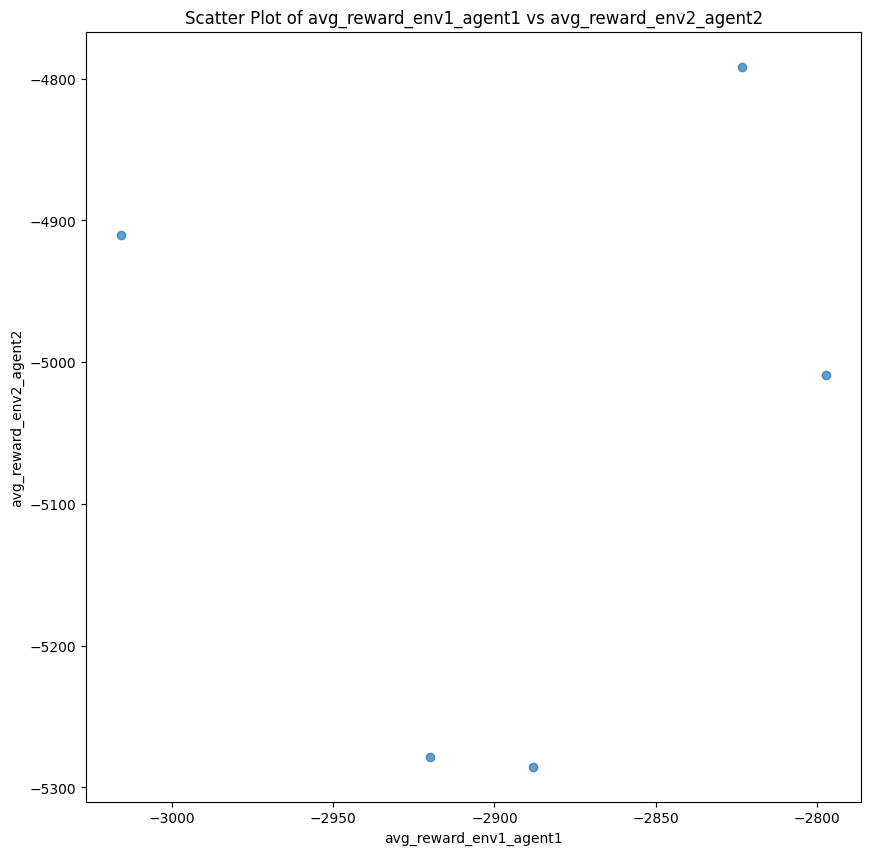

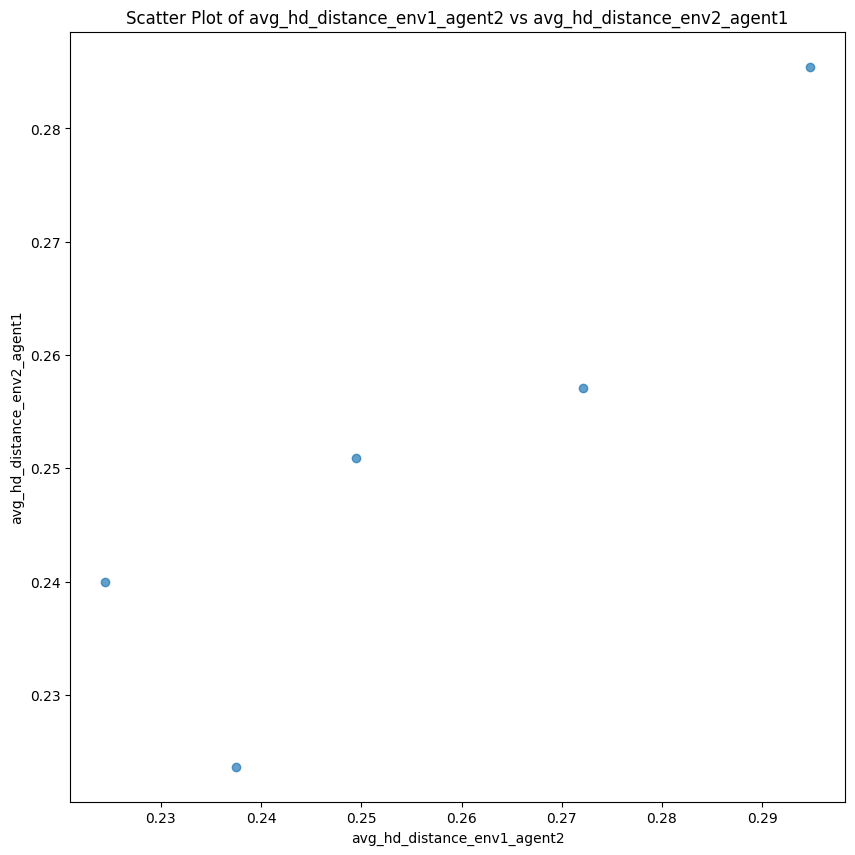

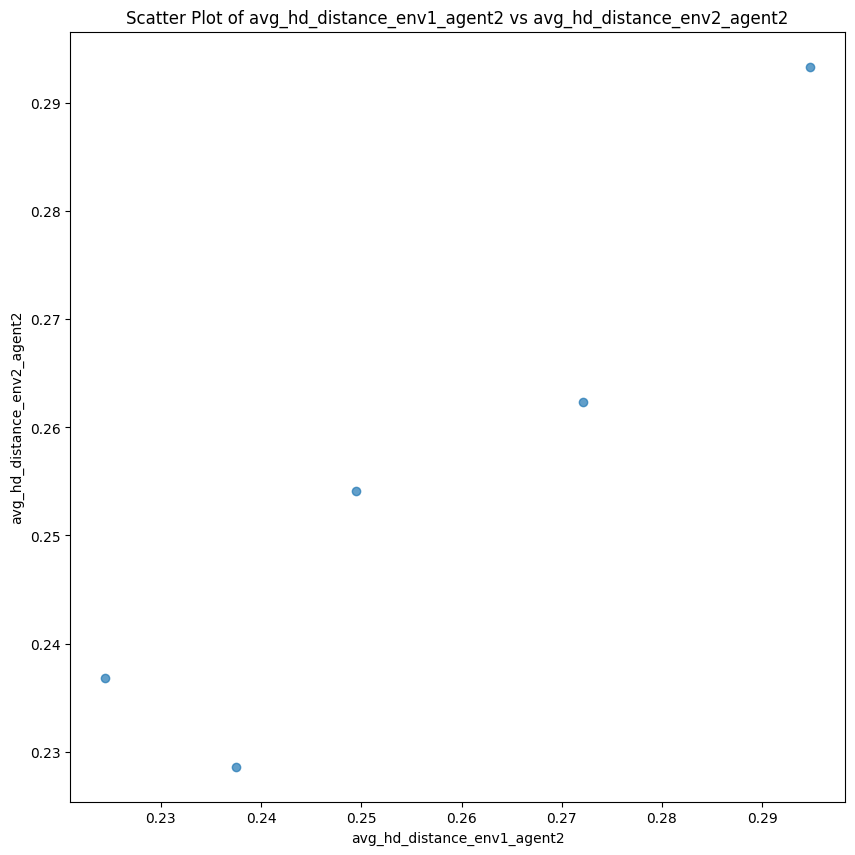

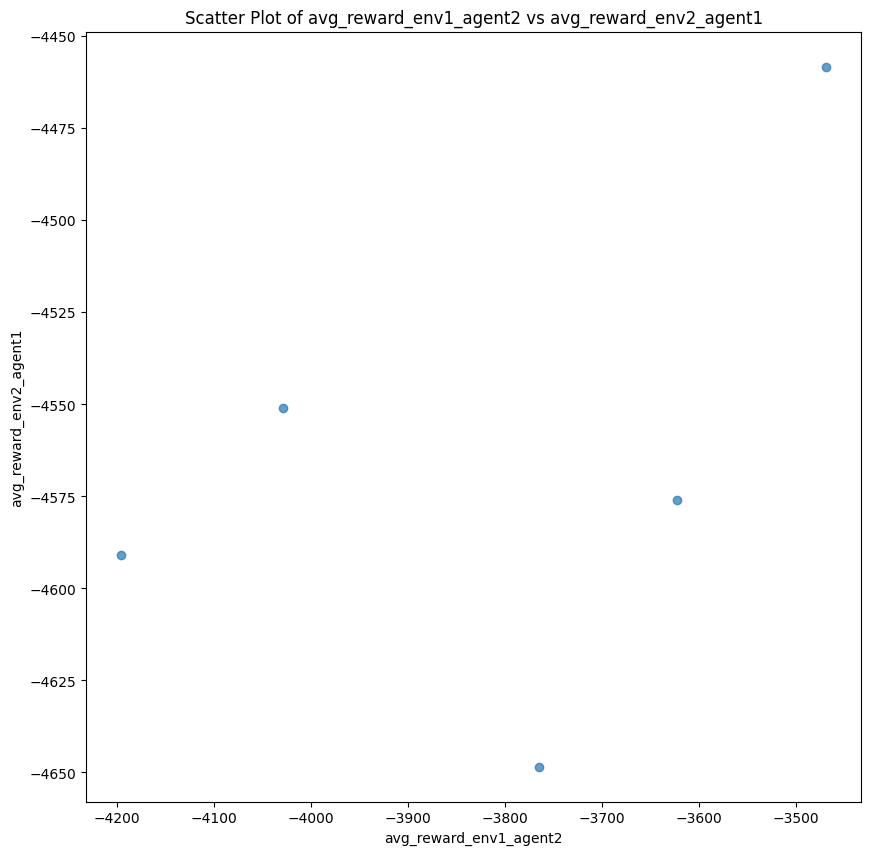

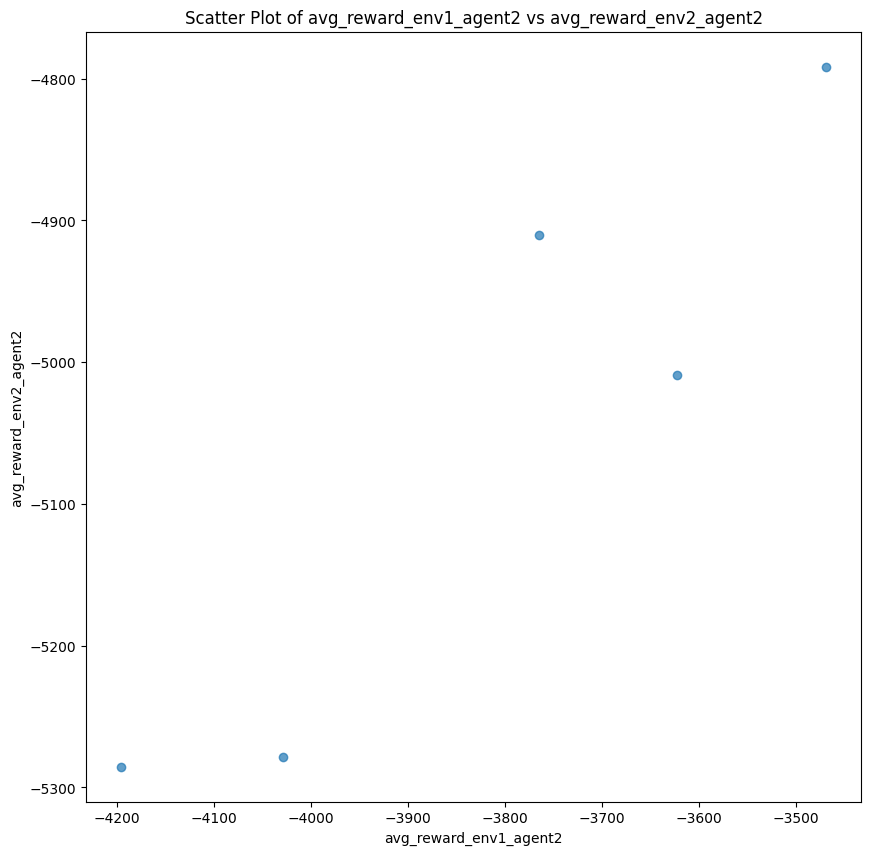

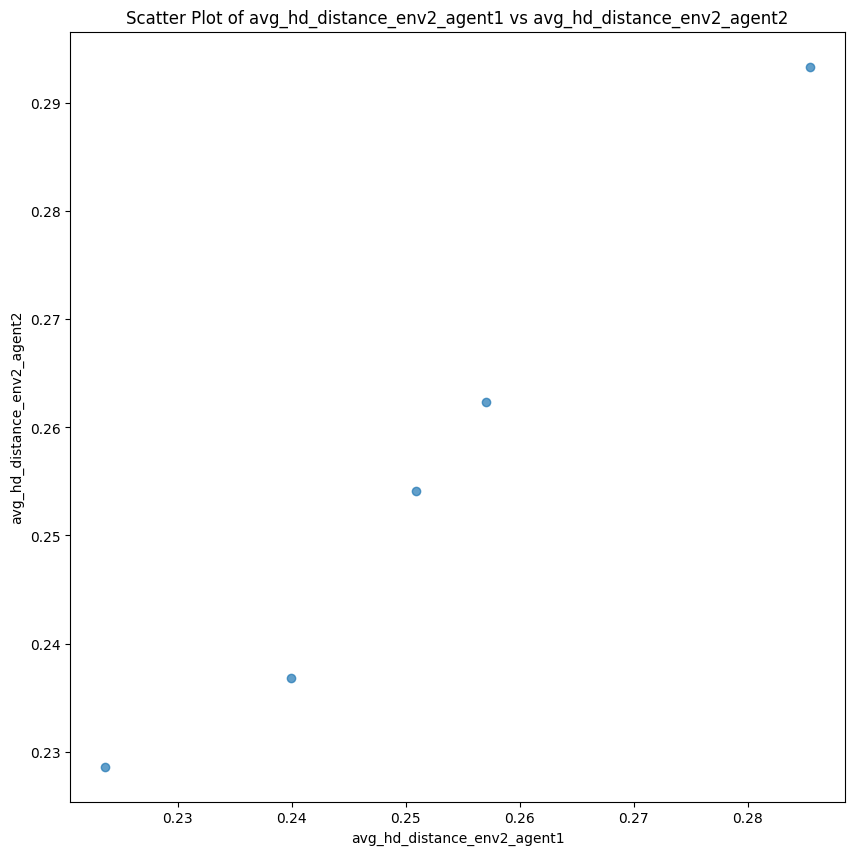

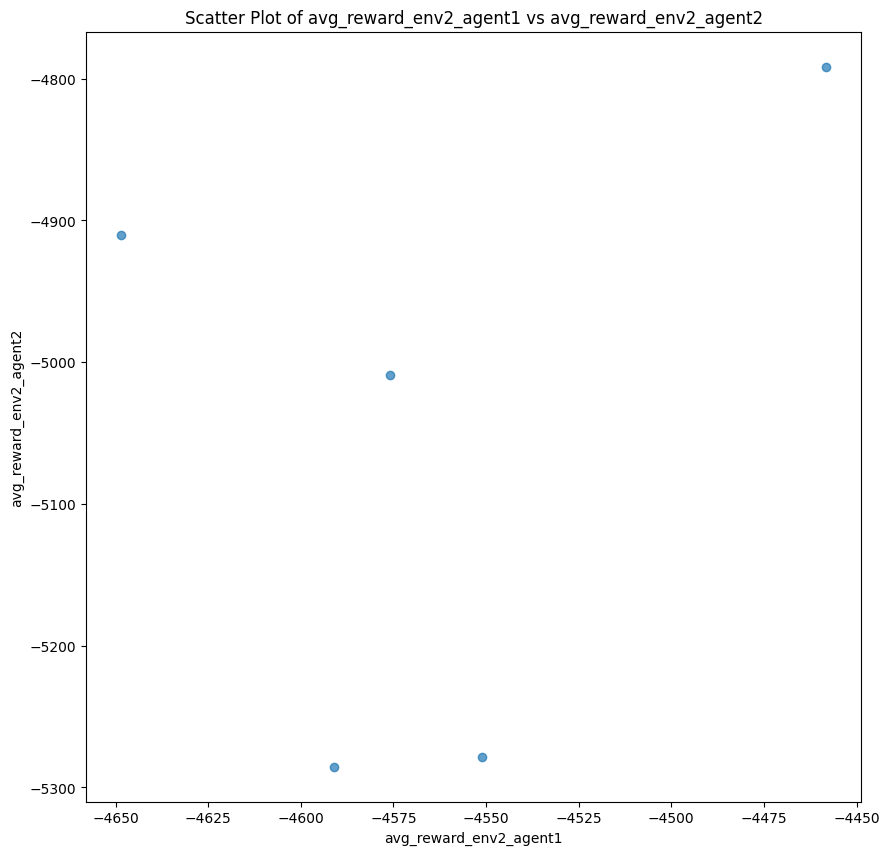

In [16]:


column_pairs = list(itertools.combinations(df.columns, 2))

# Create scatter plots
# naming convention: {metric}_{traffic}_{agent}
for col1, col2 in column_pairs:
    if col1.startswith("avg_hd_distance") and col2.startswith("avg_hd_distance"):
        pass
    elif col1.startswith("avg_reward") and col2.startswith("avg_reward"):
        pass
    else:
        continue
    
    if col1 == "config" or col2 == "config":
        continue
    plt.figure(figsize=(10, 10))
    plt.scatter(df[col1], df[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()